In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [102]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [104]:
df = df.drop(["Unnamed: 32", "id"], axis=1)

In [105]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [106]:
d = {"B": 0, "M": 1}
df["diagnosis"] = df["diagnosis"].map(d)

Text(0.5, 1.0, 'Пропущенные значения')

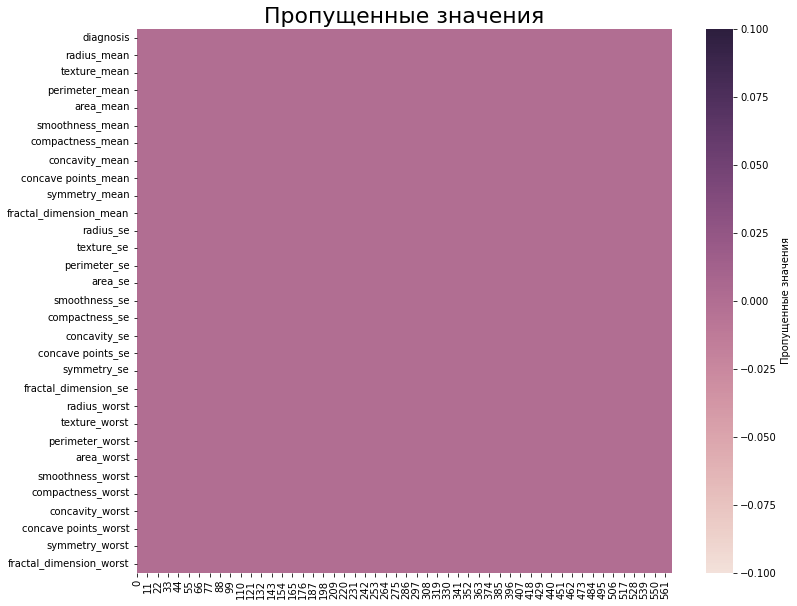

In [107]:
plt.figure(figsize=(12,10))

cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(df.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Пропущенные значения'})

plt.title("Пропущенные значения", fontsize=22)

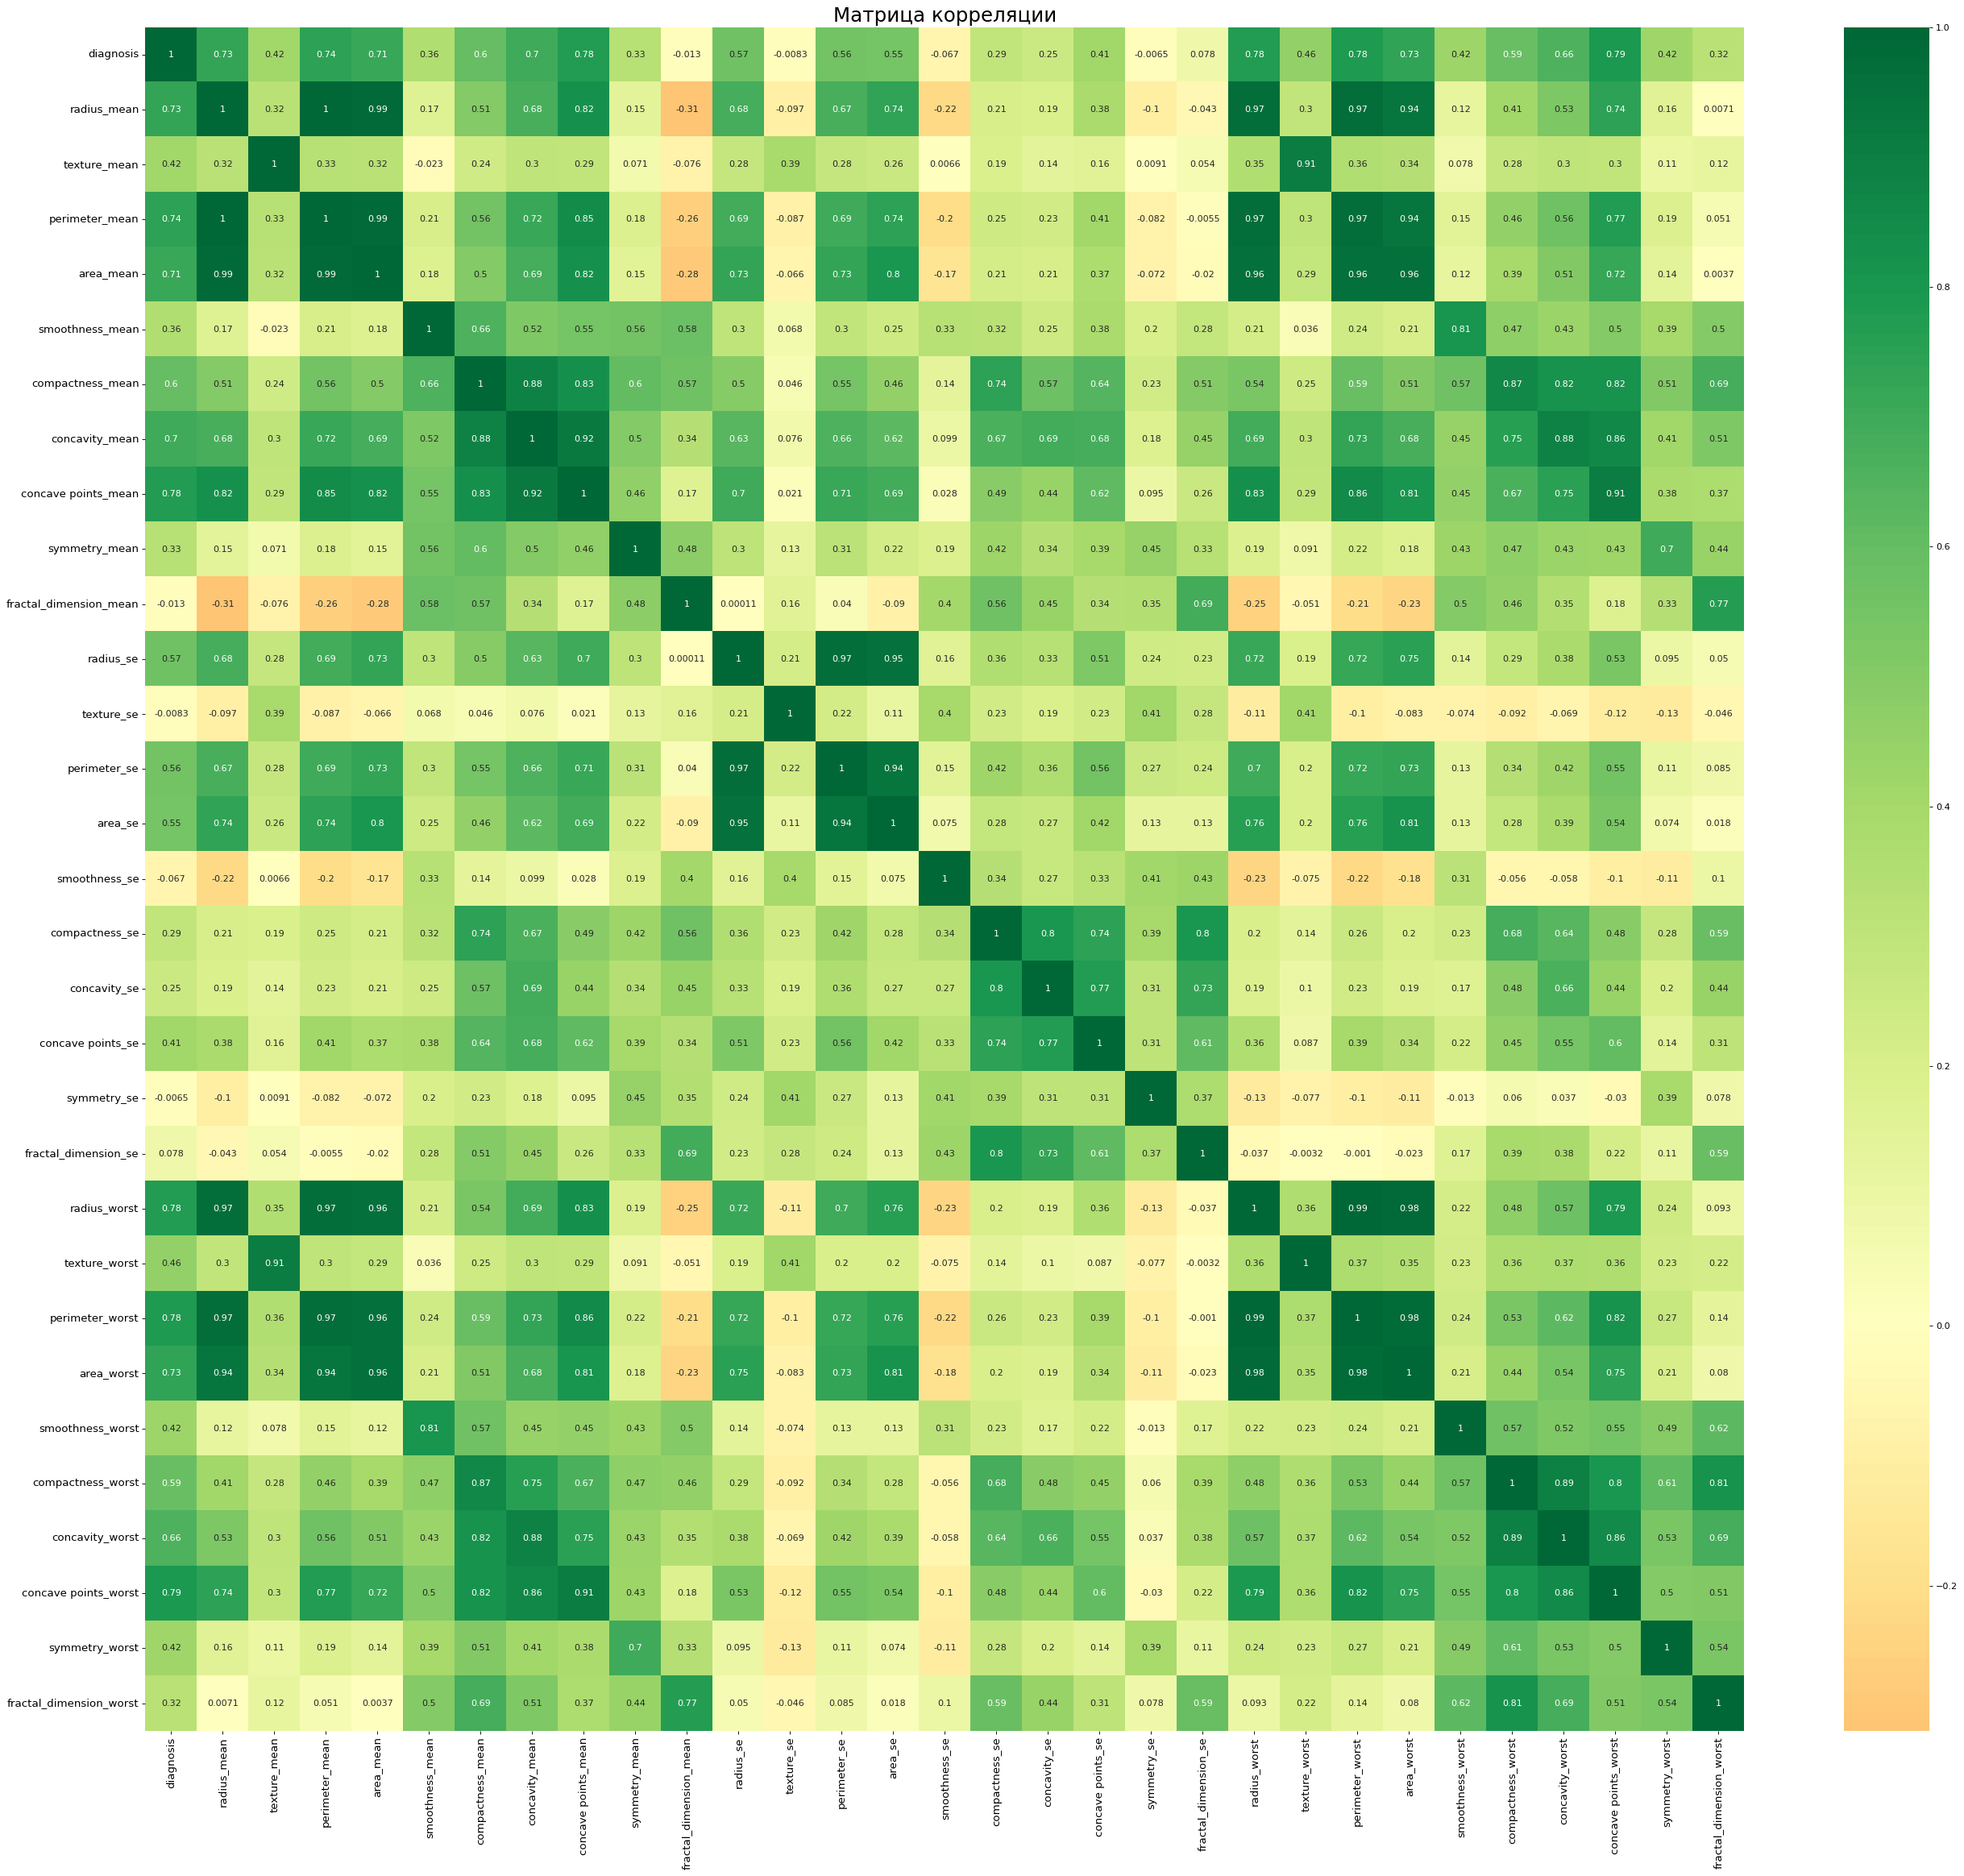

In [108]:
plt.figure(figsize=(40,35), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Матрица корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [87]:
cols = df.corr().columns
cols_corr = []
for index, row in df.corr().iterrows():
  for i in cols:
    if row[i] >= 0.9 and i != index and i not in cols_corr:
      cols_corr.append(i)
cols_corr

['perimeter_mean',
 'area_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'texture_worst',
 'radius_mean',
 'concave points_mean',
 'concavity_mean',
 'concave points_worst',
 'perimeter_se',
 'area_se',
 'radius_se',
 'texture_mean']

In [88]:
df = df.drop(cols_corr, axis=1)

In [109]:
y = df["diagnosis"]
X = df.drop(["diagnosis"], axis=1)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [143]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [146]:
w0 = model.intercept_
w0

array([-0.34733618])

In [147]:
w1 = model.coef_
w1

array([[-1.75653051, -0.11174154,  0.09145449, -0.00870557,  0.08010197,
         0.33071055,  0.4426827 ,  0.1849168 ,  0.10290343,  0.02294222,
        -0.08279561, -0.95112355, -0.54767795,  0.13696097,  0.00639283,
         0.06859172,  0.08312235,  0.02240313,  0.02044348,  0.00683544,
        -1.73938245,  0.34293852,  0.13672608,  0.03205213,  0.13859591,
         1.07080927,  1.22277835,  0.35801691,  0.34310351,  0.10987573]])

In [148]:
s = f"y = {w0[0]}"
for i in range(len(w1[0])):
  s += f" + {w1[0][i]} * x{i + 1}"
print(s)

y = -0.34733618086312545 + -1.7565305074983268 * x1 + -0.1117415449772771 * x2 + 0.09145449395620942 * x3 + -0.008705569669613602 * x4 + 0.0801019674167624 * x5 + 0.3307105523692687 * x6 + 0.4426826991789463 * x7 + 0.1849167954856835 * x8 + 0.10290342744944063 * x9 + 0.02294221929658305 * x10 + -0.08279561437924643 * x11 + -0.9511235458938122 * x12 + -0.5476779516283656 * x13 + 0.1369609726281374 * x14 + 0.006392833512976913 * x15 + 0.06859171526247673 * x16 + 0.08312234740765473 * x17 + 0.022403130291514327 * x18 + 0.02044347514871059 * x19 + 0.006835441505455885 * x20 + -1.739382446705928 * x21 + 0.34293852055074286 * x22 + 0.13672608288243296 * x23 + 0.0320521288216429 * x24 + 0.13859591216468267 * x25 + 1.0708092746004751 * x26 + 1.2227783516162887 * x27 + 0.35801690809674547 * x28 + 0.34310350778324006 * x29 + 0.10987573301031493 * x30


In [144]:
pred = model.predict(X_test)

In [145]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test, pred)

array([[113,   2],
       [  5,  51]])

In [149]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 113
FP: 2
FN: 5
TP: 51


**Accuracy**

измеряет количество верно классифицированных объектов относительно общего количества всех объектов. Это доля правильных ответов.

Используя confusion matrix можно рассчитать accuracy следующим образом:


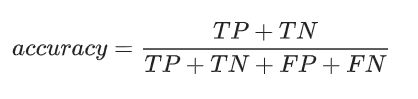

In [150]:
print((tp + tn) / (tp + tn + fp + fn))
accuracy_score(y_test, pred)

0.9590643274853801


0.9590643274853801

**Recall** (полнота)
 
Сколько объектов наша модель смогла правильно классифицировать с позитивной меткой из всего множества позитивных (т.е. как много объектов класса 1 находит наш классификатор).

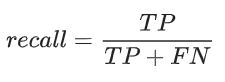

In [151]:
print(tp / (tp + fn))
recall_score(y_test, pred)

0.9107142857142857


0.9107142857142857

**Precision** (точность)

Можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными. Насколько мы можем доверять нашему классификатору.

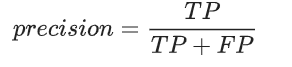

In [152]:
print(tp / (tp + fp))
precision_score(y_test, pred)

0.9622641509433962


0.9622641509433962

**F1 score** (F мера)

Сочетание precision и recall, дает некоторый компромисс между ними двумя, оценка F1 достигает своего наилучшего значения в 1 и худшее в 0.

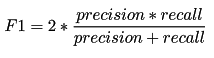

In [153]:
print(2 * ((tp / (tp + fn)) * (tp / (tp + fp))) / ((tp / (tp + fn)) + (tp / (tp + fp))))
f1_score(y_test, pred)

0.9357798165137615


0.9357798165137615

Метрики получились хорошие, потому что accuracy, recall, precision, f1 > 0.9.